In [8]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=122645 sha256=60a6af5a3d4c4a9982576c2967fba96ba487cbcf0ff4dd4f8cd76a9e805da1de
  Stored in directory: /tmp/pip-ephem-wheel-cache-wt2utnq2/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [76]:
T = [0, 100]
nb_node = 6
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15

p_link = numpy.sqrt(nb_node)/nb_node

In [77]:
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  4
Nb of segmented links :  4.0
Nb of event times :  15


<AxesSubplot:xlabel='t', ylabel='Nodes'>

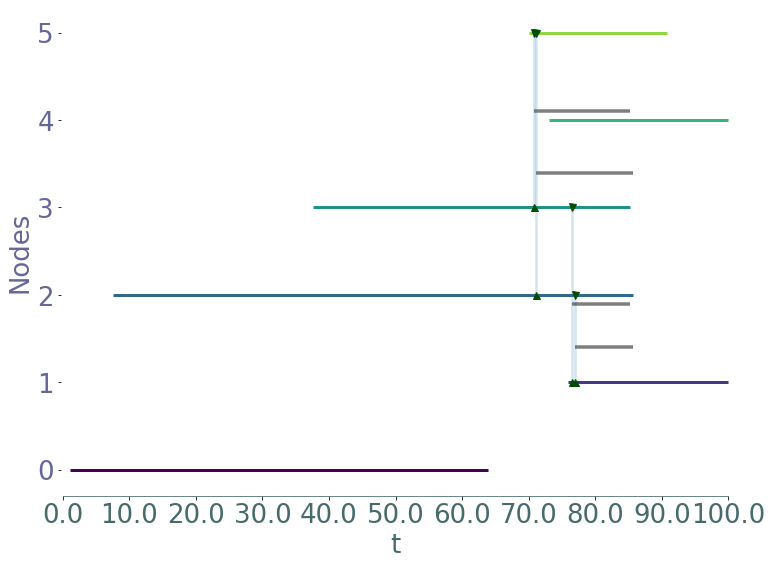

In [78]:
S.plot()

In [79]:
SS = S.stream_graph_to_link_stream()

In [80]:
SS.write_to_matthieu_link_stream("erdos")

In [81]:
betweenness, general_contri, nouveau, events, features = bt.betweenness_all(SS)

0
1
2
3
4
5


In [82]:
bt.simulations(SS, "papier")

0
1
2
3
4
5


In [83]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [84]:
import os
cmd = 'mv erdos_mat.ls archive_code/Test'
os.system(cmd)

0

In [91]:
import os
cmd = 'python2 archive_code/betweenness_all.py Test/erdos_mat.ls -1 res'
os.system(cmd)

[1.1308940848602123, 70.75854692767031, 71.12462021087455, 76.58710978380334, 76.99483540499104, 85.20753633756169, 85.70629317822616, 100.0]
<lslib.LinkStream instance at 0x7f9ad01c95a0> 1 1 (1.1308940848602123, '1') latency [(70.75854692767031, 70.75854692767031), (71.12462021087455, 71.12462021087455), (76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169), (85.70629317822616, 85.70629317822616)]
('contri', '1', '1', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f9ad01c95a0> 1 3 (1.1308940848602123, '1') latency [(76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169)]
('contri', '1', '3', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f9ad01c95a0> 1 2 (1.1308940848602123, '1') latency [(76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169), (85.70629317822616, 85.70629317822616)]
('contri', '1', '

0

In [92]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [93]:
bet_mat.keys()

dict_keys(['1', '3', '2', '5'])

In [94]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5'])

In [95]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if bet_moi[v][t] != bet_mat[v.lower()][t]:
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

erreur  1 76.58710978380334 =>    30.765432418324234 0.0
erreur  2 76.58710978380334 =>    30.765432418324234 0.0
erreur  3 76.58710978380334 =>    30.765432418324234 0.0
erreur  5 76.58710978380334 =>    30.765432418324234 0.0


In [96]:
events

[1.1308940848602123,
 70.75854692767031,
 71.12462021087455,
 76.58710978380334,
 76.99483540499104,
 85.20753633756169,
 85.70629317822616,
 100]

In [120]:
#contribution check
node = 1

In [121]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/erdos_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
os.system(cmd)

('filename', 'cont')
lol
wech
<lslib.LinkStream instance at 0x7f2f22392780> 1 1 (1.1308940848602123, '1') latency [(70.75854692767031, 70.75854692767031), (71.12462021087455, 71.12462021087455), (76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169), (85.70629317822616, 85.70629317822616)]
('contri', '1', '1', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f2f22392780> 1 3 (1.1308940848602123, '1') latency [(76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169)]
('contri', '1', '3', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f2f22392780> 1 2 (1.1308940848602123, '1') latency [(76.58710978380334, 76.58710978380334), (76.99483540499104, 76.99483540499104), (85.20753633756169, 85.20753633756169), (85.70629317822616, 85.70629317822616)]
('contri', '1', '2', ' = ', 0.0)
<lslib.LinkStream instance at 0x7f2f22392780> 1 5 (1.1308940848602123, '1') latency [(76.5871097

0

In [122]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [124]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if general_contri[node][v][t].val != cont_mat[S.node_to_label[v].lower()][t]:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  2 76.58710978380334 =>    ( 0 30.765432418324234 ) 0.0
erreur  5 76.58710978380334 =>    ( 0 30.765432418324234 ) 0.0
erreur  3 76.58710978380334 =>    ( 0 30.765432418324234 ) 0.0
erreur  1 76.58710978380334 =>    ( 0 30.765432418324234 ) 0.0


In [108]:
cont_mat['b']

KeyError: 'b'

In [117]:
general_contri[0]

{0: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 1: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 2: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 3: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 4: {1.1308940848602123: vol(0,0),
  70.7585

In [125]:
SS.write_to_sg("examples/erdos")

In [126]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100